### Lab 7: Higgs Classification

In [1]:
import pickle
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams["figure.figsize"] = (20,15)

# open the file of interest, and use pickle loading
infile = open ("lab5/qcd_100000_pt_250_500.pkl",'rb') # signal dataset
qcd = pickle.load(infile)
infile = open ("lab5/higgs_100000_pt_250_500.pkl",'rb') # background dataset
higgs = pickle.load(infile)

# list all keys of the files
print(qcd.keys())
print(higgs.keys())

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


## 1) Make a stacked histogram plot for the feature variable: mass

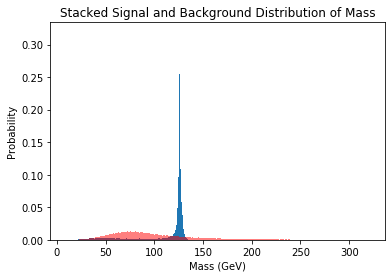

In [3]:
plt.hist(higgs['mass'], 500, density=True)
plt.hist(qcd['mass'], 500, color='red', alpha=.5, density=True)
plt.title('Stacked Signal and Background Distribution of Mass')
plt.xlabel('Mass (GeV)')
plt.ylabel('Probability')
plt.show()

# a. Evaluate expected significance without any event selection

In [4]:
lenMass = len(qcd['mass'])
meanBG = np.mean(qcd['mass'])
prob = stats.poisson.cdf(125, meanBG) # x signal is eyeballed to 125
sigma = stats.norm.ppf(prob)
print('The signal of 125 is ', sigma, '\N{greek small letter sigma}')

lenSigMass = len(higgs['mass'])
NBG = 20000
NSig = 100
value = NSig / math.sqrt(NBG)
print('length of signal / square root of length of background = ', value)

The signal of 125 is  2.70499414329355 σ
length of signal / square root of length of background =  0.7071067811865475


## 2) Identify mass cuts to optimize the expected significance.

# a. Try different mass cuts systematically

84.94699999999999  and  5181.0
Significance (Mass cuts 100-150):  1.180160975626716


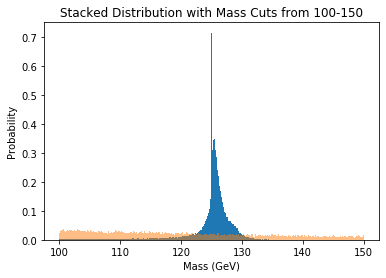

82.788  and  3015.2000000000003
Significance (Mass cuts 110-140):  1.507680538089882


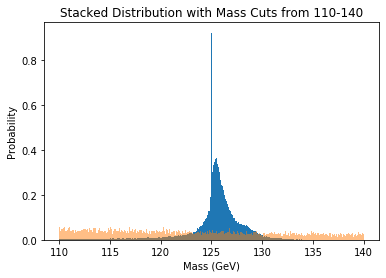

75.847  and  980.1999999999999
Significance (Mass cuts 120-130):  2.4225963501794676


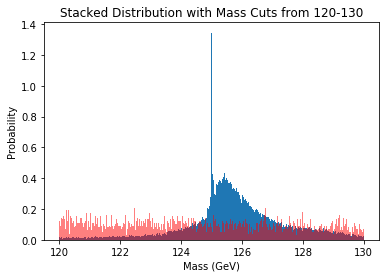

In [18]:
origArr1 = len(qcd['mass'])
origSig1 = len(qcd['mass'])
newArr1 = []
newSig1 = []
for i in range(len(qcd['mass'])):
    if(qcd['mass'][i] < 150 and qcd['mass'][i] > 100):
        newArr1.append(qcd['mass'][i])
    if(higgs['mass'][i] < 150 and higgs['mass'][i] > 100):
        newSig1.append(higgs['mass'][i])
print(100 * (len(newSig1) / origSig1), ' and ', 20000 * (len(newArr1) / origArr1))
print('Significance (Mass cuts 100-150): ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
plt.hist(newSig1, 500, density=True)
plt.hist(newArr1, 500, density=True, alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 100-150')
plt.xlabel('Mass (GeV)')
plt.ylabel('Probability')
plt.show()

# origArr1 = len(qcd['mass'])
# origSig1 = len(qcd['mass'])
newArr1 = []
newSig1 = []
for i in range(len(qcd['mass'])):
    if(qcd['mass'][i] < 140 and qcd['mass'][i] > 110):
        newArr1.append(qcd['mass'][i])
    if(higgs['mass'][i] < 140 and higgs['mass'][i] > 110):
        newSig1.append(higgs['mass'][i])
print(100 * (len(newSig1) / origSig1), ' and ', 20000 * (len(newArr1) / origArr1))
print('Significance (Mass cuts 110-140): ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
plt.hist(newSig1, 500, density=True)
plt.hist(newArr1, 500, density=True, alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 110-140')
plt.xlabel('Mass (GeV)')
plt.ylabel('Probability')
plt.show()

# origArr1 = len(qcd['mass'])
# origSig1 = len(qcd['mass'])
newArr1 = []
newSig1 = []
for i in range(len(qcd['mass'])):
    if(qcd['mass'][i] < 130 and qcd['mass'][i] > 120):
        newArr1.append(qcd['mass'][i])
    if(higgs['mass'][i] < 130 and higgs['mass'][i] > 120):
        newSig1.append(higgs['mass'][i])
print(100 * (len(newSig1) / origSig1), ' and ', 20000 * (len(newArr1) / origArr1))
print('Significance (Mass cuts 120-130): ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
plt.hist(newSig1, 500, density=True)
plt.hist(newArr1, 500, density=True, alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('Mass (GeV)')
plt.ylabel('Probability')
plt.show()

# b. Evaluate expected significance for each set of mass cuts

Mass cut from 100-150:
Nhiggs = 8, Nqcd = 6378.51
significance = Nhiggs/sqrt(Nqcd) = 1.18

Mass cut from 110-140:
Nhiggs = 90.32, Nqcd = 3800.34
significance = Nhiggs/sqrt(Nqcd) = 1.51

Mass cut from 120-130:
Nhiggs = 83.01, Nqcd = 1250.81
significance = Nhiggs/sqrt(Nqcd) = 2.42

# c. Identify the set of the mass cuts which give you the highest significance.

The method with which I went about performing these mass cuts largely revolved around normalizing my dataset. I am working with the lowPT dataset and so my Nhiggs = 100 while my Nqcd = 20,000 and so my initial significance (Nhiggs/sqrt(Nqcd)) = .71. This is a pretty low significance compared to the expected significance of 2.70 we calculated without event selection and so I needed to perform mass cuts to eliminate as much background as I could to isolate the signal and get a higher signficance reading. To do this I took the 'total' number of values in 'qcd' so that I would have a value to normalize with. Then, I iterated through every value in 'qcd' and discovered which of them were within my accepted boundary of values for my mass cut (100-150, 110-140, and 120-130. I determined these mass cut values by looking at the graph and understanding that the signal data was around 125 so that I should cut around it. I systematially decreased the sensitivity by 20 each time I took a mass cut to observe the patterns that occur with it.) and put these values in a 'newNorm' list. Then I divided the number of values in 'newNorm' by the number of values in 'qcd', or 'total', to normalize the datasets to 1 so the bins of the histogram add up to 1. Finally I multiplied this value by 20,000 to normalize the dataset to 20,000 instead of 1. Then I repeated this process for Nhiggs but normalized to 100 instead.

I performed these processes to find the above listed significance values and found that the more sensitive testing of 120-130 gave me the highest signficance of 2.42 and this value was the closest to my expected value of 2.70.

## 3) Make stacked histogram plots for the rest of features

# a. Set A of plots without any event selection

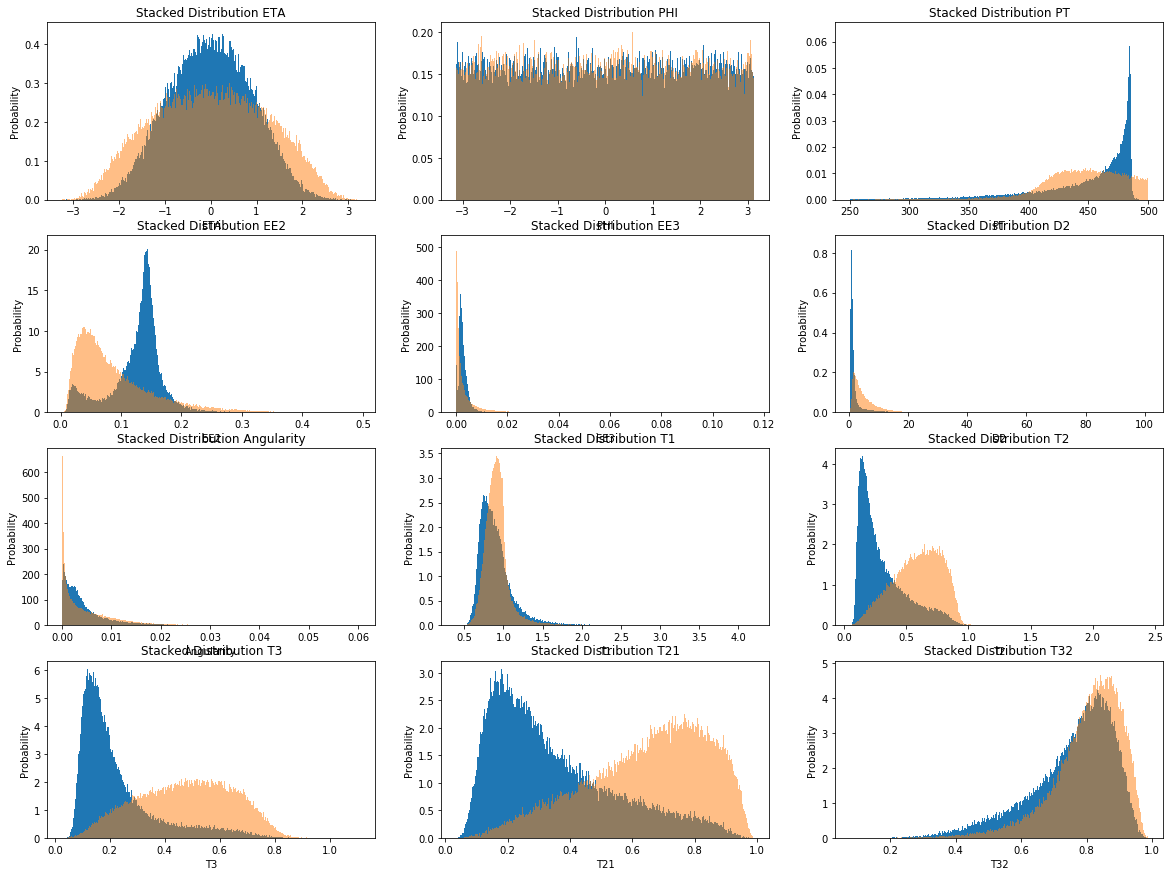

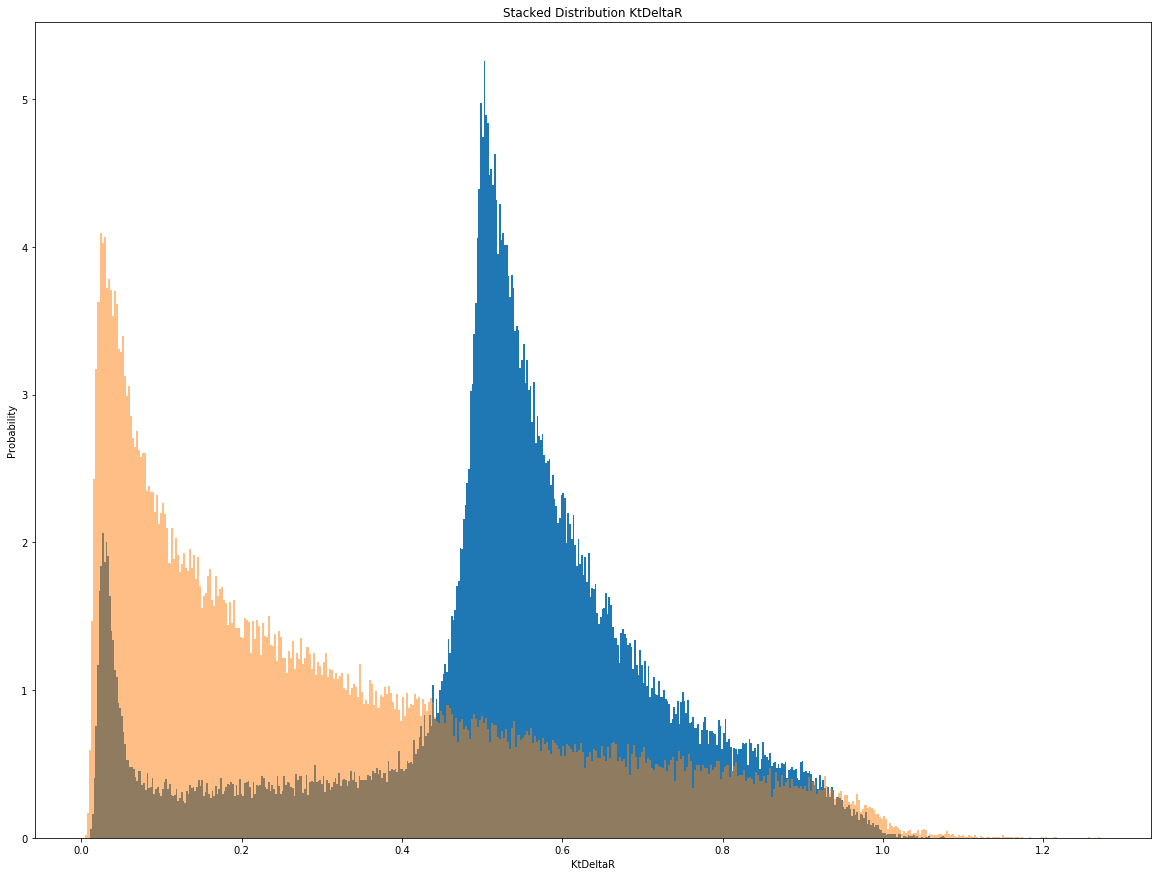

In [22]:
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(4, 3)
ax[0][0].hist(higgs['eta'], 500, density=True)
ax[0][0].hist(qcd['eta'], 500, density=True, alpha=.5)
ax[0][0].set_title('Stacked Distribution ETA')
ax[0][0].set_ylabel('Probability')
ax[0][0].set_xlabel('ETA')
ax[0][1].hist(higgs['phi'], 500, density=True)
ax[0][1].hist(qcd['phi'], 500, density=True, alpha=.5)
ax[0][1].set_title('Stacked Distribution PHI')
ax[0][1].set_ylabel('Probability')
ax[0][1].set_xlabel('PHI')
ax[0][2].hist(higgs['pt'], 500, density=True)
ax[0][2].hist(qcd['pt'], 500, density=True, alpha=.5)
ax[0][2].set_title('Stacked Distribution PT')
ax[0][2].set_ylabel('Probability')
ax[0][2].set_xlabel('PT')

ax[1][0].hist(higgs['ee2'], 500, density=True)
ax[1][0].hist(qcd['ee2'], 500, density=True, alpha=.5)
ax[1][0].set_title('Stacked Distribution EE2')
ax[1][0].set_ylabel('Probability')
ax[1][0].set_xlabel('EE2')
ax[1][1].hist(higgs['ee3'], 500, density=True)
ax[1][1].hist(qcd['ee3'], 500, density=True, alpha=.5)
ax[1][1].set_title('Stacked Distribution EE3')
ax[1][1].set_ylabel('Probability')
ax[1][1].set_xlabel('EE3')
ax[1][2].hist(higgs['d2'], 500, density=True)
ax[1][2].hist(qcd['d2'], 500, density=True, alpha=.5)
ax[1][2].set_title('Stacked Distribution D2')
ax[1][2].set_ylabel('Probability')
ax[1][2].set_xlabel('D2')

ax[2][0].hist(higgs['angularity'], 500, density=True)
ax[2][0].hist(qcd['angularity'], 500, density=True, alpha=.5)
ax[2][0].set_title('Stacked Distribution Angularity')
ax[2][0].set_ylabel('Probability')
ax[2][0].set_xlabel('Angularity')
ax[2][1].hist(higgs['t1'], 500, density=True)
ax[2][1].hist(qcd['t1'], 500, density=True, alpha=.5)
ax[2][1].set_title('Stacked Distribution T1')
ax[2][1].set_ylabel('Probability')
ax[2][1].set_xlabel('T1')
ax[2][2].hist(higgs['t2'], 500, density=True)
ax[2][2].hist(qcd['t2'], 500, density=True, alpha=.5)
ax[2][2].set_title('Stacked Distribution T2')
ax[2][2].set_ylabel('Probability')
ax[2][2].set_xlabel('T2')

ax[3][0].hist(higgs['t3'], 500, density=True)
ax[3][0].hist(qcd['t3'], 500, density=True, alpha=.5)
ax[3][0].set_title('Stacked Distribution T3')
ax[3][0].set_ylabel('Probability')
ax[3][0].set_xlabel('T3')
ax[3][1].hist(higgs['t21'], 500, density=True)
ax[3][1].hist(qcd['t21'], 500, density=True, alpha=.5)
ax[3][1].set_title('Stacked Distribution T21')
ax[3][1].set_ylabel('Probability')
ax[3][1].set_xlabel('T21')
ax[3][2].hist(higgs['t32'], 500, density=True)
ax[3][2].hist(qcd['t32'], 500, density=True, alpha=.5)
ax[3][2].set_title('Stacked Distribution T32')
ax[3][2].set_ylabel('Probability')
ax[3][2].set_xlabel('T32')
plt.show()

plt.hist(higgs['KtDeltaR'], 500, density=True)
plt.hist(qcd['KtDeltaR'], 500, density=True, alpha=.5)
plt.title('Stacked Distribution KtDeltaR')
plt.ylabel('Probability')
plt.xlabel('KtDeltaR')
plt.show()

At first glance it appears that 3-to-2

30.636999999999997  and  306.4
Significance (Mass cuts 120-130):  1.7502571323589478


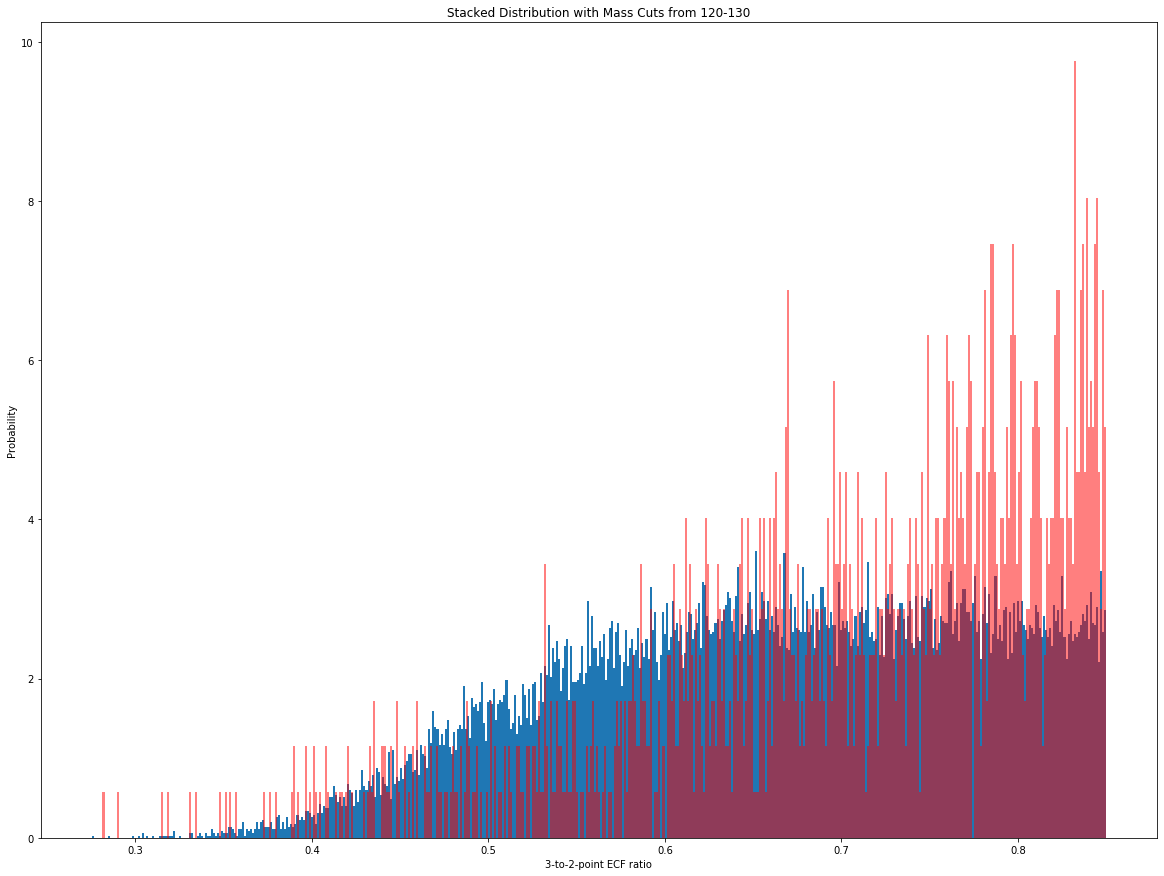

50.931000000000004  and  4165.400000000001
Significance (Mass cuts .002-.005):  0.7891396175621561


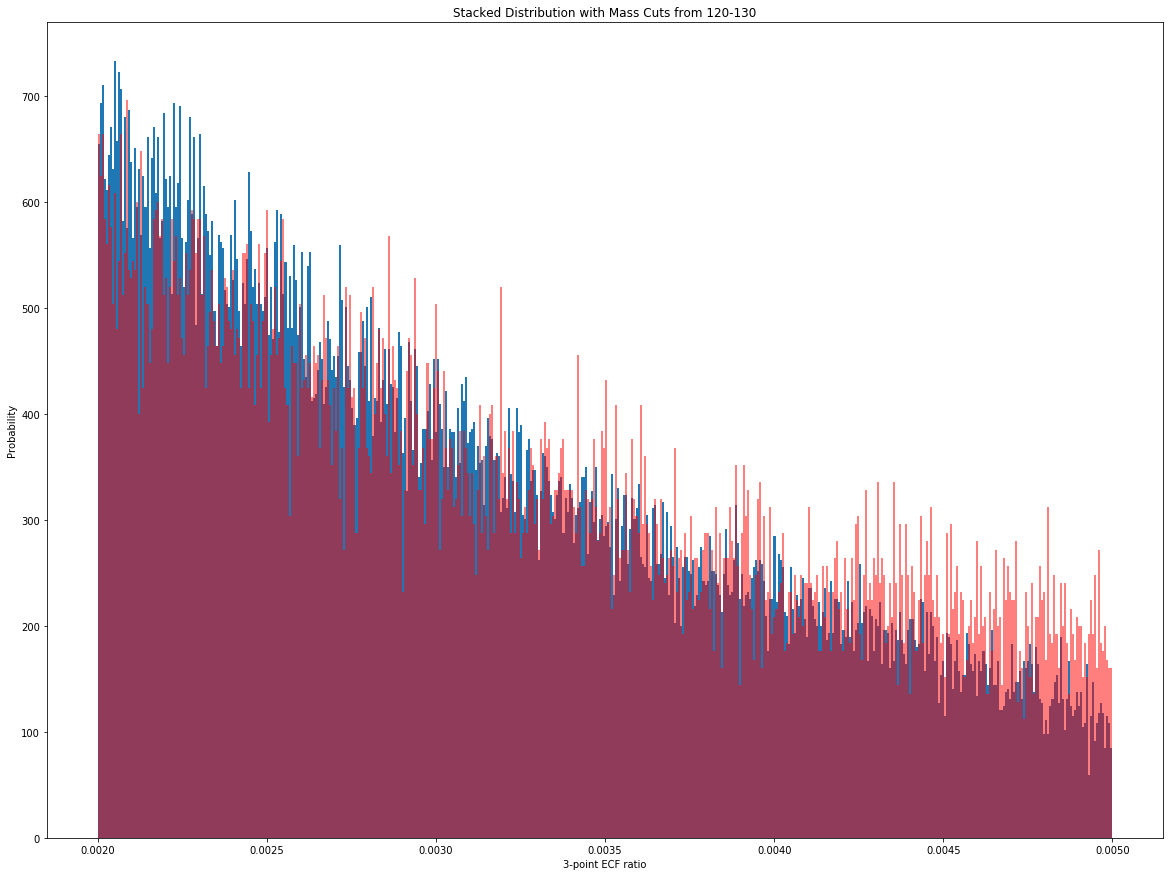

In [12]:
# plt.rcParams["figure.figsize"] = (20,15)
# plt.hist(higgs['d2'], 500, density=True)
# plt.hist(qcd['d2'], 500, density=True, color='red', alpha=.5)
# plt.xlim(0, 5)
# plt.show()

word = 'd2'
newArr1 = []
newSig1 = []
for i in range(len(qcd[word])):
    if(qcd[word][i] < .85 and qcd[word][i] > 0):
        newArr1.append(qcd[word][i])
    if(higgs[word][i] < .85 and higgs[word][i] > 0):
        newSig1.append(higgs[word][i])
print(100 * (len(newSig1) / origSig1), ' and ', 20000 * (len(newArr1) / origArr1))
print('Significance (Mass cuts 120-130): ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
plt.hist(newSig1, 500, density=True)
plt.hist(newArr1, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('3-to-2-point ECF ratio')
plt.ylabel('Probability')
plt.show()

# plt.hist(higgs['ee3'], 500, density=True)
# plt.hist(qcd['ee3'], 500, density=True, color='red', alpha=.5)
# plt.xlim(0, 0.025)
# plt.show()

word = 'ee3'
newArr1 = []
newSig1 = []
for i in range(len(qcd[word])):
    if(qcd[word][i] < .005 and qcd[word][i] > .002):
        newArr1.append(qcd[word][i])
    if(higgs[word][i] < .005 and higgs[word][i] > .002):
        newSig1.append(higgs[word][i])
print(100 * (len(newSig1) / origSig1), ' and ', 20000 * (len(newArr1) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
plt.hist(newSig1, 500, density=True)
plt.hist(newArr1, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('3-point ECF ratio')
plt.ylabel('Probability')
plt.show()

Interestingly we find that the signficance of the 3-to-2-point ECF ratio is 1.75 and the signficance of the 3-point ECF ratio is .79 which is not anywhere near the signficance of the mass which is at 2.42. Thus I am concluding that none of the other features are as discriminative as the mass feature.

40.294000000000004  and  719.1999999999999
Significance (Mass cuts .002-.005):  1.5025036743498927


77.756  and  5409.8
Significance (Mass cuts .002-.005):  1.0571662900890928


62.499  and  1621.6
Significance (Mass cuts .002-.005):  1.5520338918354906


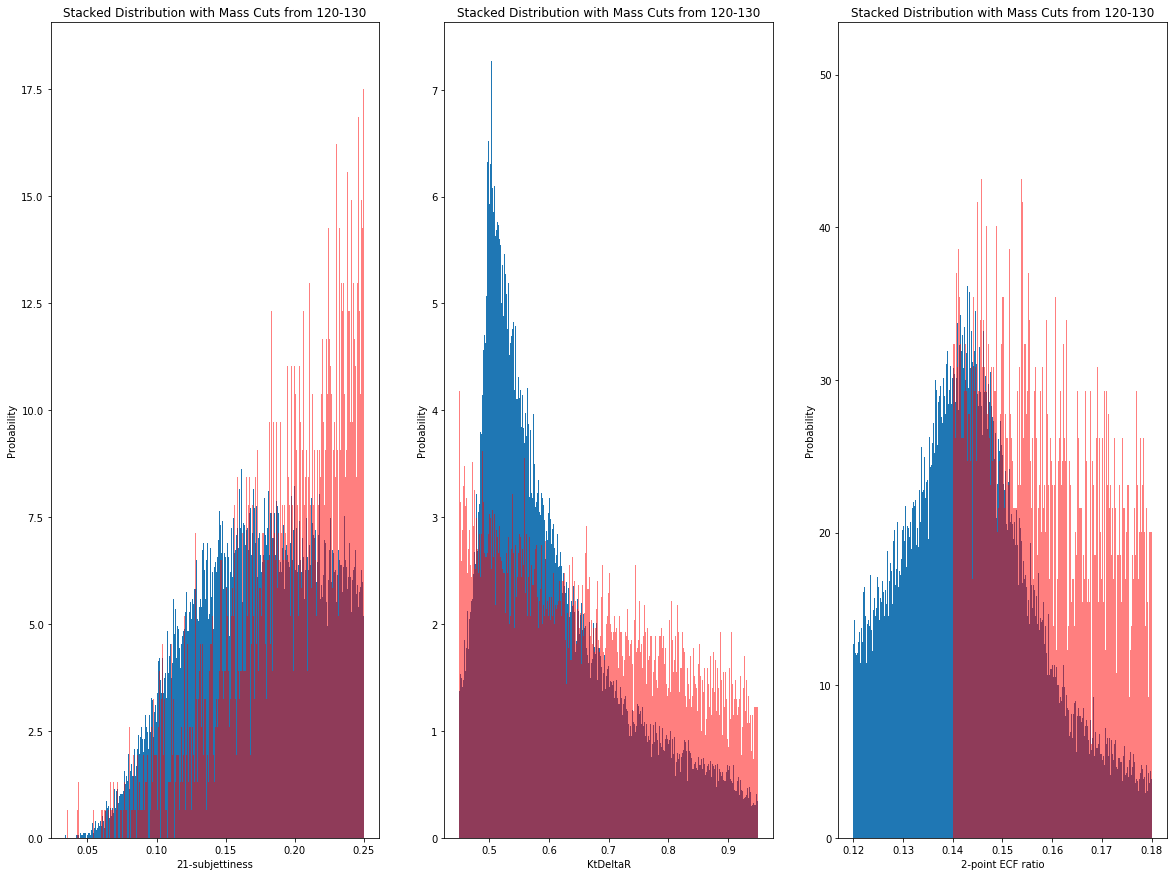

38.358  and  523.6
Significance (Mass cuts .002-.005):  1.676316948048076


58.748999999999995  and  1209.4
Significance (Mass cuts .002-.005):  1.6893338973891063


15.058  and  702.2
Significance (Mass cuts .002-.005):  0.5682466449540785


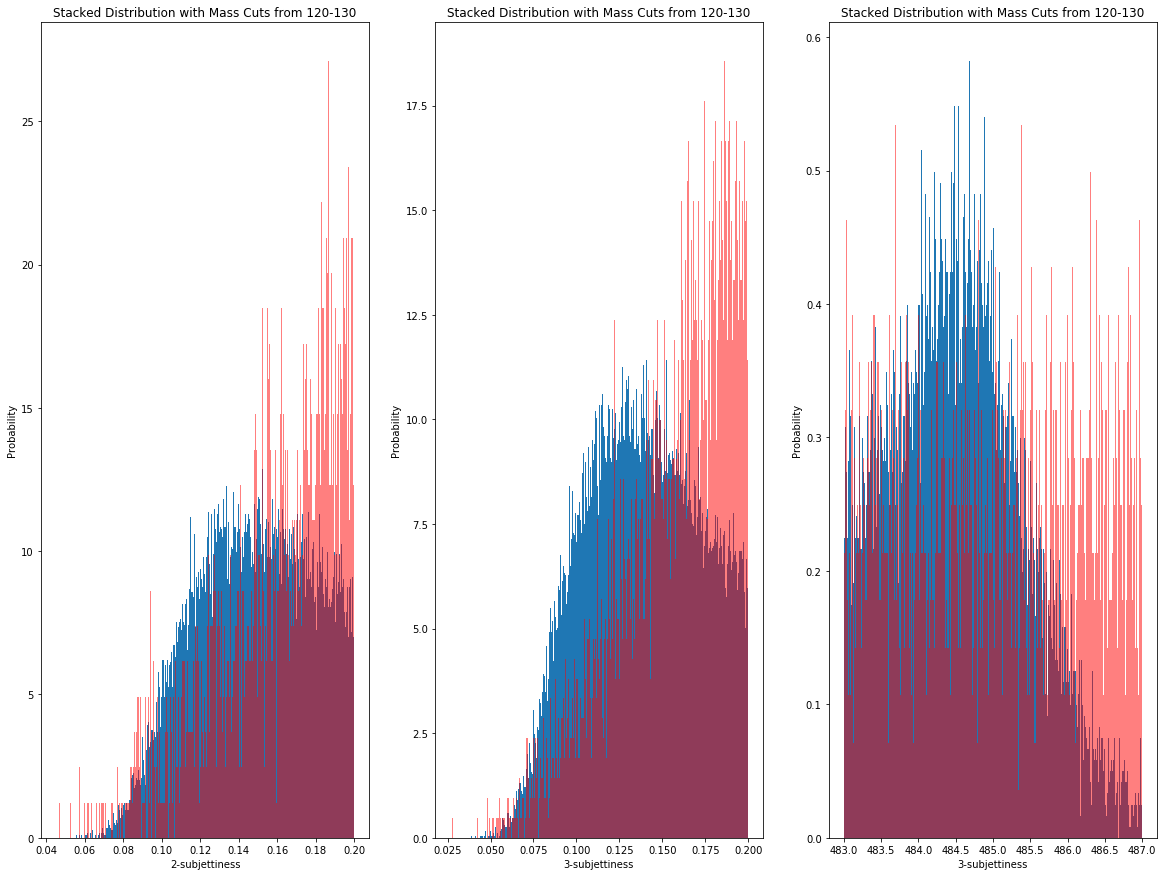

In [42]:
fig, ax = plt.subplots(1, 3)
# plt.hist(higgs['t21'], 500, density=True)
# plt.hist(qcd['ee3'], 500, density=True, color='red', alpha=.5)
# plt.xlim(0, 0.025)
# plt.show()

word = 't21'
newArr1 = []
newSig1 = []
for i in range(len(qcd[word])):
    if(qcd[word][i] < .25 and qcd[word][i] > 0):
        newArr1.append(qcd[word][i])
    if(higgs[word][i] < .25 and higgs[word][i] > 0):
        newSig1.append(higgs[word][i])
print(100 * (len(newSig1) / origSig1), ' and ', 20000 * (len(newArr1) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
ax[0].hist(newSig1, 500, density=True)
ax[0].hist(newArr1, 500, density=True, color='red', alpha=.5)
ax[0].set_title('Stacked Distribution with Mass Cuts from 120-130')
ax[0].set_xlabel('21-subjettiness')
ax[0].set_ylabel('Probability')

word = 'KtDeltaR'
newArr1 = []
newSig1 = []
for i in range(len(qcd[word])):
    if(qcd[word][i] < .95 and qcd[word][i] > 0.45):
        newArr1.append(qcd[word][i])
    if(higgs[word][i] < .95 and higgs[word][i] > 0.45):
        newSig1.append(higgs[word][i])
print(100 * (len(newSig1) / origSig1), ' and ', 20000 * (len(newArr1) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
ax[1].hist(newSig1, 500, density=True)
ax[1].hist(newArr1, 500, density=True, color='red', alpha=.5)
ax[1].set_title('Stacked Distribution with Mass Cuts from 120-130')
ax[1].set_xlabel('KtDeltaR')
ax[1].set_ylabel('Probability')

word = 'ee2'
newArr1 = []
newSig1 = []
for i in range(len(qcd[word])):
    if(qcd[word][i] < .18 and qcd[word][i] > .14):
        newArr1.append(qcd[word][i])
    if(higgs[word][i] < .18 and higgs[word][i] > .12):
        newSig1.append(higgs[word][i])
print(100 * (len(newSig1) / origSig1), ' and ', 20000 * (len(newArr1) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
ax[2].hist(newSig1, 500, density=True)
ax[2].hist(newArr1, 500, density=True, color='red', alpha=.5)
ax[2].set_title('Stacked Distribution with Mass Cuts from 120-130')
ax[2].set_xlabel('2-point ECF ratio')
ax[2].set_ylabel('Probability')
plt.show()

fig, ax = plt.subplots(1, 3)
word = 't2'
newArr1 = []
newSig1 = []
for i in range(len(qcd[word])):
    if(qcd[word][i] < .2 and qcd[word][i] > 0):
        newArr1.append(qcd[word][i])
    if(higgs[word][i] < .2 and higgs[word][i] > 0):
        newSig1.append(higgs[word][i])
print(100 * (len(newSig1) / origSig1), ' and ', 20000 * (len(newArr1) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
ax[0].hist(newSig1, 500, density=True)
ax[0].hist(newArr1, 500, density=True, color='red', alpha=.5)
ax[0].set_title('Stacked Distribution with Mass Cuts from 120-130')
ax[0].set_xlabel('2-subjettiness')
ax[0].set_ylabel('Probability')

word = 't3'
newArr1 = []
newSig1 = []
for i in range(len(qcd[word])):
    if(qcd[word][i] < .2 and qcd[word][i] > 0):
        newArr1.append(qcd[word][i])
    if(higgs[word][i] < .2 and higgs[word][i] > 0):
        newSig1.append(higgs[word][i])
print(100 * (len(newSig1) / origSig1), ' and ', 20000 * (len(newArr1) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
ax[1].hist(newSig1, 500, density=True)
ax[1].hist(newArr1, 500, density=True, color='red', alpha=.5)
ax[1].set_title('Stacked Distribution with Mass Cuts from 120-130')
ax[1].set_xlabel('3-subjettiness')
ax[1].set_ylabel('Probability')

word = 'pt'
newArr1 = []
newSig1 = []
for i in range(len(qcd[word])):
    if(qcd[word][i] < 487 and qcd[word][i] > 483):
        newArr1.append(qcd[word][i])
    if(higgs[word][i] < 487 and higgs[word][i] > 483):
        newSig1.append(higgs[word][i])
print(100 * (len(newSig1) / origSig1), ' and ', 20000 * (len(newArr1) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
ax[2].hist(newSig1, 500, density=True)
ax[2].hist(newArr1, 500, density=True, color='red', alpha=.5)
ax[2].set_title('Stacked Distribution with Mass Cuts from 120-130')
ax[2].set_xlabel('3-subjettiness')
ax[2].set_ylabel('Probability')
plt.show()

In this part I plotted all of the features who I believed would yield good significance after mass cuts which I determined by seeing if a lot of the background coincided with the signal. These features were 2-subjettines, 3-subjettines, KtDeltaR, 21-subjettiness, 3-2-point ECF ratio, as well as 2-point ECF ratio and all of these features yielded a signficance greater than 1. From here I decided that D2 has most discriination so I am going to do optimal mass cuts for D2.

# b. Set B of plots with your optimal mass cuts

75.847  and  980.1999999999999
Significance (Mass cuts .002-.005):  2.4225963501794676


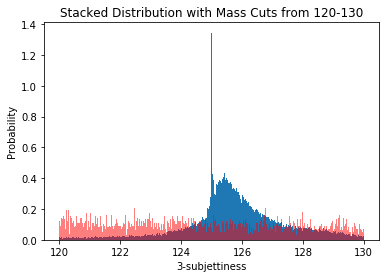

75.847  and  980.1999999999999
Significance (Mass cuts .002-.005):  2.4225963501794676


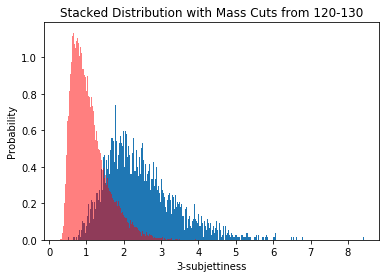

75.847  and  980.1999999999999
Significance (Mass cuts .002-.005):  2.4225963501794676


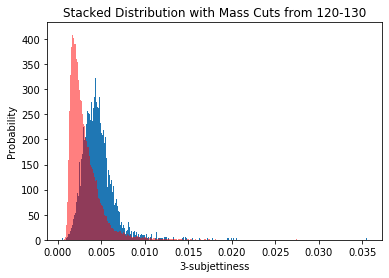

75.847  and  980.1999999999999
Significance (Mass cuts .002-.005):  2.4225963501794676


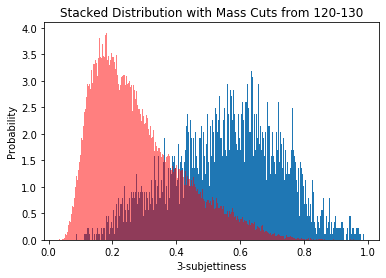

75.847  and  980.1999999999999
Significance (Mass cuts .002-.005):  2.4225963501794676


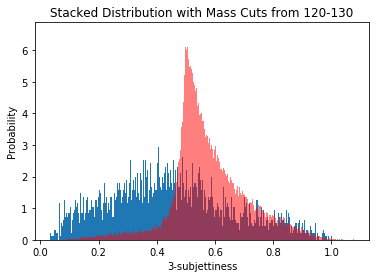

75.847  and  980.1999999999999
Significance (Mass cuts .002-.005):  2.4225963501794676


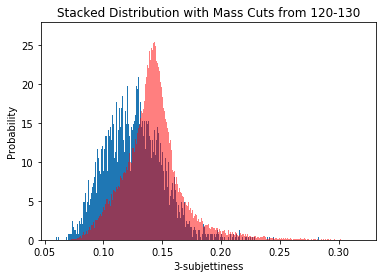

75.847  and  980.1999999999999
Significance (Mass cuts .002-.005):  2.4225963501794676


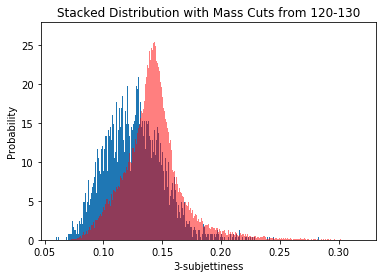

75.847  and  980.1999999999999
Significance (Mass cuts .002-.005):  2.4225963501794676


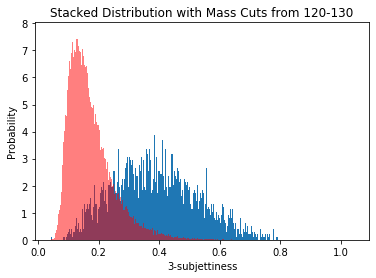

75.847  and  980.1999999999999
Significance (Mass cuts .002-.005):  2.4225963501794676


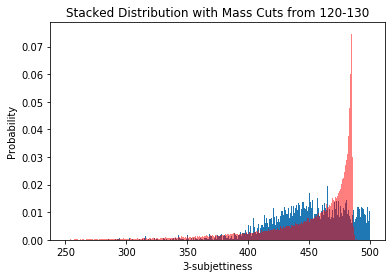

In [58]:
# plt.hist(higgs['pt'], 500, density=True)
# plt.hist(qcd['pt'], 500, density=True, color='red', alpha=.5)
# plt.xlim(450, 500)
# plt.show()

origArr1 = len(qcd['mass'])
origSig1 = len(qcd['mass'])

word = 'mass'
newArr1Mass = []
newSig1Mass = []
arr1Ind = []
sig1Ind = []
for i in range(len(qcd[word])):
    if(qcd[word][i] < 130 and qcd[word][i] > 120):
        newArr1Mass.append(qcd[word][i])
        arr1Ind.append(i)
    if(higgs[word][i] < 130 and higgs[word][i] > 120):
        newSig1Mass.append(higgs[word][i])
        sig1Ind.append(i)
print(100 * (len(newSig1Mass) / origSig1), ' and ', 20000 * (len(newArr1Mass) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(newSig1Mass) / origSig1)) / (20000 * (len(newArr1Mass) / origArr1))**.5)
plt.hist(newSig1Mass, 500, density=True)
plt.hist(newArr1Mass, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()


# qcd['mass'][arr1Ind[0]:arr1Ind[-1]]
arr1MassD2 = []
arr1MassSigD2 = []
for i in arr1Ind:
    arr1MassD2.append(qcd['d2'][i])
for i in sig1Ind:
    arr1MassSigD2.append(higgs['d2'][i])

print(100 * (len(arr1MassSigD2) / origSig1), ' and ', 20000 * (len(arr1MassD2) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(arr1MassSigD2) / origSig1)) / (20000 * (len(arr1MassD2) / origArr1))**.5)

plt.hist(arr1MassD2, 500, density=True)
plt.hist(arr1MassSigD2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
# plt.yscale('log')
plt.show()

#############################

arr1Mass = []
arr1MassSig = []
for i in arr1Ind:
    arr1Mass.append(qcd['ee3'][i])
for i in sig1Ind:
    arr1MassSig.append(higgs['ee3'][i])

print(100 * (len(arr1MassSig) / origSig1), ' and ', 20000 * (len(arr1Mass) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(arr1MassSig) / origSig1)) / (20000 * (len(arr1Mass) / origArr1))**.5)

plt.hist(arr1Mass, 500, density=True)
plt.hist(arr1MassSig, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

#############################

arr1Mass = []
arr1MassSig = []
for i in arr1Ind:
    arr1Mass.append(qcd['t21'][i])
for i in sig1Ind:
    arr1MassSig.append(higgs['t21'][i])

print(100 * (len(arr1MassSig) / origSig1), ' and ', 20000 * (len(arr1Mass) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(arr1MassSig) / origSig1)) / (20000 * (len(arr1Mass) / origArr1))**.5)

plt.hist(arr1Mass, 500, density=True)
plt.hist(arr1MassSig, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

#############################

arr1Mass = []
arr1MassSig = []
for i in arr1Ind:
    arr1Mass.append(qcd['KtDeltaR'][i])
for i in sig1Ind:
    arr1MassSig.append(higgs['KtDeltaR'][i])

print(100 * (len(arr1MassSig) / origSig1), ' and ', 20000 * (len(arr1Mass) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(arr1MassSig) / origSig1)) / (20000 * (len(arr1Mass) / origArr1))**.5)

plt.hist(arr1Mass, 500, density=True)
plt.hist(arr1MassSig, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

#############################

arr1Mass = []
arr1MassSig = []
for i in arr1Ind:
    arr1Mass.append(qcd['ee2'][i])
for i in sig1Ind:
    arr1MassSig.append(higgs['ee2'][i])

print(100 * (len(arr1MassSig) / origSig1), ' and ', 20000 * (len(arr1Mass) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(arr1MassSig) / origSig1)) / (20000 * (len(arr1Mass) / origArr1))**.5)

plt.hist(arr1Mass, 500, density=True)
plt.hist(arr1MassSig, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

#############################

arr1MassT2 = []
arr1MassSigT2 = []
for i in arr1Ind:
    arr1MassT2.append(qcd['t2'][i])
for i in sig1Ind:
    arr1MassSigT2.append(higgs['t2'][i])

print(100 * (len(arr1MassSigT2) / origSig1), ' and ', 20000 * (len(arr1MassT2) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(arr1MassSigT2) / origSig1)) / (20000 * (len(arr1MassT2) / origArr1))**.5)

plt.hist(arr1Mass, 500, density=True)
plt.hist(arr1MassSig, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

#############################

arr1Mass = []
arr1MassSig = []
for i in arr1Ind:
    arr1Mass.append(qcd['t3'][i])
for i in sig1Ind:
    arr1MassSig.append(higgs['t3'][i])

print(100 * (len(arr1MassSig) / origSig1), ' and ', 20000 * (len(arr1Mass) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(arr1MassSig) / origSig1)) / (20000 * (len(arr1Mass) / origArr1))**.5)

plt.hist(arr1Mass, 500, density=True)
plt.hist(arr1MassSig, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

#############################

arr1Mass = []
arr1MassSig = []
for i in arr1Ind:
    arr1Mass.append(qcd['pt'][i])
for i in sig1Ind:
    arr1MassSig.append(higgs['pt'][i])

print(100 * (len(arr1MassSig) / origSig1), ' and ', 20000 * (len(arr1Mass) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(arr1MassSig) / origSig1)) / (20000 * (len(arr1Mass) / origArr1))**.5)

plt.hist(arr1Mass, 500, density=True)
plt.hist(arr1MassSig, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

#############################

In this part I plotted all of the features who I believed would yield good significance after mass cuts which I determined by seeing if a lot of the background coincided with the signal. These features were 2-subjettines, 3-subjettines, KtDeltaR, 21-subjettiness, 3-2-point ECF ratio, as well as 2-point ECF ratio and all of these features yielded a signficance greater than 1. From here I decided that D2 has most discriination so I am going to do optimal mass cuts for D2.

## 4) Optimize event selections using multiple features (if necessary)

As mentioned before, the 2-subjettines, 3-subjettines, KtDeltaR, 21-subjettiness, as well as 2-point ECF ratio features all yielded a signficance greater than 1 however the features that are most impactful to the significance of the dataset is 3-to-2-point ECF ratio as well as mass. 3-to-2-point ECF ratio has a signficance of 1.75 while the mass feature had a significance of 2.42 which has a much higher signficance than the other features listed previously that averaged a signficance of around 1.25.

- My Most signficant value is D2 so I'll use this to find the max signficance for mass cuts.
- I'll use D2 indices to cut on 'mass' and I'll use that.

# a. Find a set of feature cuts which can help you to achieve the best significance.

Significance (Mass cuts .002-.005):  2.4225963501794676
71.761  and  355.8
Significance (Mass cuts .002-.005):  3.804394193544661


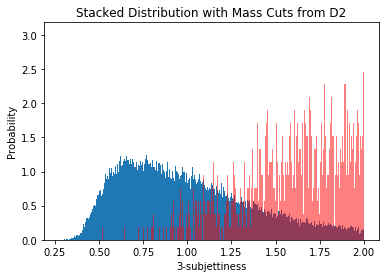

71.761  and  355.8
Significance (Mass cuts .002-.005):  3.804394193544661


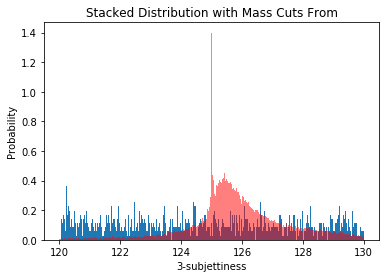

71.761  and  355.8
Significance (Mass cuts .002-.005):  3.804394193544661


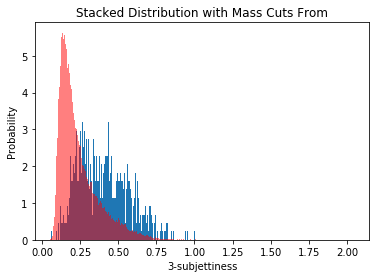

61.090999999999994  and  159.4
Significance (Mass cuts .002-.005):  4.838748789011665


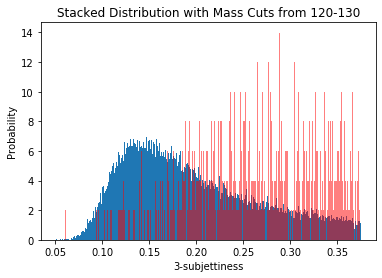

61.090999999999994  and  159.4
Significance (Mass cuts .002-.005):  4.838748789011665


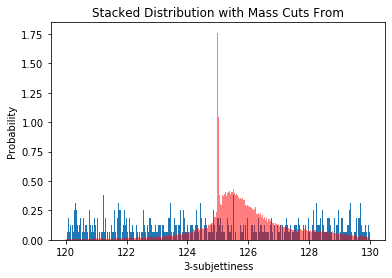

61.090999999999994  and  159.4
Significance (Mass cuts .002-.005):  4.838748789011665


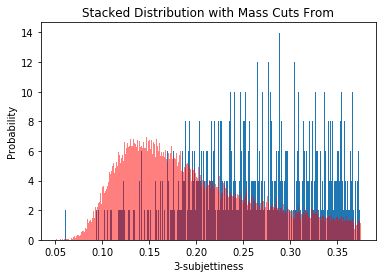

In [60]:
# arr1MassD2
# arr1MassSigD2

print('Significance (Mass cuts .002-.005): ', (100 * (len(arr1MassSigD2) / origSig1)) / (20000 * (len(arr1MassD2) / origArr1))**.5)
# newSig1 = arr1MassSigD2
# newArr1 = arr1MassD2
newArr1D2 = []
newSig1D2 = []
arr1Ind = []
sig1Ind = []
for i in range(len(arr1MassD2)):
    if(arr1MassD2[i] < 2 and arr1MassD2[i] > 0):
        newArr1D2.append(arr1MassD2[i])
        arr1Ind.append(i)
for i in range(len(arr1MassSigD2)):
    if(arr1MassSigD2[i] < 2 and arr1MassSigD2[i] > 0):
        newSig1D2.append(arr1MassSigD2[i])
        sig1Ind.append(i)
# for i in range(len(higgs['mass'])):
#     if(qcd['d2'][i] < 10 and qcd['d2'][i] > 0):
#         newArr1.append(higgs['d2'][i])
#         arr1Ind.append(i)
#     if(higgs['d2'][i] < 10 and higgs['d2'][i] > 0):
#         newSig1.append(higgs['d2'][i])
#         sig1Ind.append(i)
print(100 * (len(newSig1D2) / origSig1), ' and ', 20000 * (len(newArr1D2) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(newSig1D2) / origSig1)) / (20000 * (len(newArr1D2) / origArr1))**.5)
plt.hist(newSig1D2, 500, density=True)
plt.hist(newArr1D2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from D2')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

arr1MassFirst = []
arr1MassSigFirst = []
for i in arr1Ind:
    arr1MassFirst.append(newArr1Mass[i])
for i in sig1Ind:
    arr1MassSigFirst.append(newSig1Mass[i])

print(100 * (len(arr1MassSigFirst) / origSig1), ' and ', 20000 * (len(arr1MassFirst) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(arr1MassSigFirst) / origSig1)) / (20000 * (len(arr1MassFirst) / origArr1))**.5)

plt.hist(arr1MassFirst, 500, density=True)
plt.hist(arr1MassSigFirst, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts From')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

arr1MassSecond = []
arr1MassSigSecond = []
for i in arr1Ind:
    arr1MassSecond.append(arr1MassT2[i])
for i in sig1Ind:
    arr1MassSigSecond.append(arr1MassSigT2[i])

print(100 * (len(arr1MassSigSecond) / origSig1), ' and ', 20000 * (len(arr1MassSecond) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(arr1MassSigSecond) / origSig1)) / (20000 * (len(arr1MassSecond) / origArr1))**.5)

plt.hist(arr1MassSecond, 500, density=True)
plt.hist(arr1MassSigSecond, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts From')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()


####################################

newArr1 = []
newSig1 = []
arr1Ind = []
sig1Ind = []
for i in range(len(arr1MassSecond)):
    if(arr1MassSecond[i] < .375 and arr1MassSecond[i] > 0):
        newArr1.append(arr1MassSecond[i])
        arr1Ind.append(i)
for i in range(len(arr1MassSigSecond)):
    if(arr1MassSigSecond[i] < .375 and arr1MassSigSecond[i] > 0):
        newSig1.append(arr1MassSigSecond[i])
        sig1Ind.append(i)
print(100 * (len(newSig1) / origSig1), ' and ', 20000 * (len(newArr1) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(newSig1) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
plt.hist(newSig1, 500, density=True)
plt.hist(newArr1, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

arr1MassFirstT2 = []
arr1MassSigFirstT2 = []
for i in arr1Ind:
    arr1MassFirstT2.append(arr1MassFirst[i])
for i in sig1Ind:
    arr1MassSigFirstT2.append(arr1MassSigFirst[i])

print(100 * (len(arr1MassSigFirstT2) / origSig1), ' and ', 20000 * (len(arr1MassFirstT2) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(arr1MassSigFirstT2) / origSig1)) / (20000 * (len(arr1MassFirstT2) / origArr1))**.5)

plt.hist(arr1MassFirstT2, 500, density=True)
plt.hist(arr1MassSigFirstT2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts From')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

arr1MassSecondT2 = []
arr1MassSigSecondT2 = []
for i in arr1Ind:
    arr1MassSecondT2.append(arr1MassSecond[i])
for i in sig1Ind:
    arr1MassSigSecondT2.append(arr1MassSigSecond[i])

print(100 * (len(arr1MassSigSecondT2) / origSig1), ' and ', 20000 * (len(arr1MassSecondT2) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(arr1MassSigSecondT2) / origSig1)) / (20000 * (len(arr1MassSecondT2) / origArr1))**.5)

plt.hist(arr1MassSecondT2, 500, density=True)
plt.hist(arr1MassSigSecondT2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts From')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

The two features that had the highest discriminance were D2(1.75) and T2(1.68) and so I used both of these features to make mass cuts. I found from the 'mass' category that the best cuts were from around 120-130 and so I found every index in the D2 and T2 datasets that matched up with the mass cut indices and cut those out and plotted them. Then I first looked at D2 and figured out where I could cut to maximize significance and decided to cut from 0 to 2. This was a good choice as it bumped up the significance from 2.4 to 3.8 and the cuts also looked good for T2 and 'mass' on their respective graphs. Then to further the study (extra credit?) I added found the datasets of T2 and 'mass' that matched the indices of the cut D2 and looked at the plot of T2 and searched for a good cut to make. I cut from 0 to .375 and this maximized my significance to 4.84. I knew I reached a maximum when I made a more sever cut such as 0 to .175 but the significance began going down. I had found a peak at this point and that helped me determined the maximum.

# b. Compare significance (before/after event selection) dervied in your pT samples to your lab partner. Describe your findings.

In this exercise I will be examining the 3-to-2-point ECF ratio (d2) and for extra information I was using the lower dataset. Before my event selectio Nhiggs = 100 and Nqcd = 20000 which yielded a signficance of .71. However, after mass cuts I was able to yield a signficance of around 2.42 and so the percent increase could be characterized as (2.42/.71)*100 = 342% increase. My partner on the other hand had the higher dataset and so his original Nhiggs = 50 and Nqcd = 2000 which yielded a signficance of 1.18. After his mass cuts he was able to yield a significance of 2.10. This was a (2.10/1.18)*100 = 178% increase. Although the total significance of my partner's dataset was higher than mine I believe we should work with my dataset because it has a greater increase from the mass cuts (342% > 178%) which implies that less of the background is coinciding with the signal data which means my data will be less contaminated by background.

## 5) Bonus

# a. Plot 2-dimensional scattering plots between top two most discriminative features

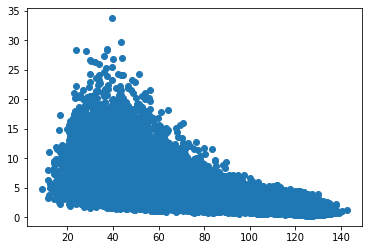

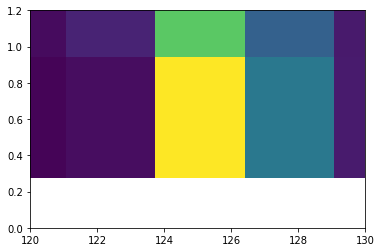

In [8]:
# x, y = np.meshgrid(higgs['mass'], qcd['mass'])
# plt.scatter(x, y)
# plt.show()
# H = np.histogram2d(higgs['mass'], qcd['mass'])
# print(H)

# origArr1 = len(qcd['mass'])
# origSig1 = len(qcd['mass'])
# newArr1 = []
# newSig1Mass = []
# for i in range(len(qcd['mass'])):
#     if(qcd['mass'][i] < 126 and qcd['mass'][i] > 124):
#         newArr1.append(qcd['mass'][i])
#     if(higgs['mass'][i] < 126 and higgs['mass'][i] > 124):
#         newSig1Mass.append(higgs['mass'][i])
# print('Significance (Mass cuts 120-130): ', (100 * (len(newSig1Mass) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)
# 
# word = 'd2'
# newArr1 = []
# newSig1D2 = []
# for i in range(len(qcd[word])):
#     if(qcd[word][i] < .9 and qcd[word][i] > 0.3):
#         newArr1.append(qcd[word][i])
#     if(higgs[word][i] < .9 and higgs[word][i] > 0.3):
#         newSig1D2.append(higgs[word][i])
# print('Significance (Mass cuts 120-130): ', (100 * (len(newSig1D2) / origSig1)) / (20000 * (len(newArr1) / origArr1))**.5)

# print(len(newSig1D2))
# print(len(newSig1Mass))

# x, y = np.meshgrid(newSig1D2, newArr1)
# plt.scatter(x, y)

# plt.scatter(higgs['d2'], qcd['d2'])
# plt.show()
# plt.hist2d(higgs['d2'], qcd['d2'], bins=(50,50), density=True)
# plt.xlim(0, 1)
# plt.show()

plt.scatter(higgs['mass'], higgs['d2'])
plt.show()
plt.hist2d(higgs['mass'], higgs['d2'], bins=(50,50), density=True)
plt.xlim(120, 130)
plt.ylim(0, 1.2)
plt.show()

75.847  and  980.1999999999999
Significance (Mass cuts .002-.005):  2.4225963501794676


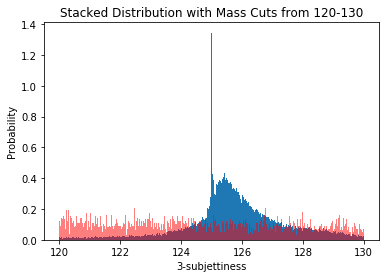

In [2]:
origArr1 = len(qcd['mass'])
origSig1 = len(qcd['mass'])

word = 'mass'
newArr1Mass = []
newSig1Mass = []
arr1Ind = []
sig1Ind = []
for i in range(len(qcd[word])):
    if(qcd[word][i] < 130 and qcd[word][i] > 120):
        newArr1Mass.append(qcd[word][i])
        arr1Ind.append(i)
    if(higgs[word][i] < 130 and higgs[word][i] > 120):
        newSig1Mass.append(higgs[word][i])
        sig1Ind.append(i)
print(100 * (len(newSig1Mass) / origSig1), ' and ', 20000 * (len(newArr1Mass) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(newSig1Mass) / origSig1)) / (20000 * (len(newArr1Mass) / origArr1))**.5)
plt.hist(newSig1Mass, 500, density=True)
plt.hist(newArr1Mass, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

75.847  and  980.1999999999999
Significance (Mass cuts .002-.005):  2.4225963501794676


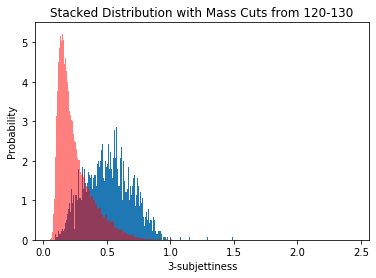

57.168  and  159.6
Significance (Mass cuts .002-.005):  4.525187255710875


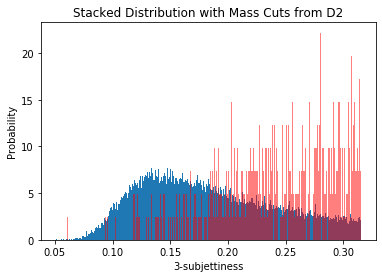

57.168  and  159.6
Significance (Mass cuts .002-.005):  4.525187255710875


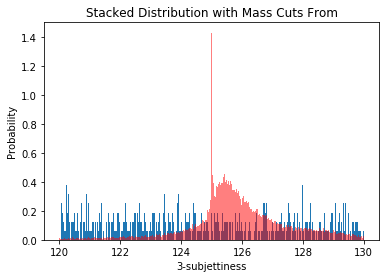

In [6]:
arr1MassD2 = []
arr1MassSigD2 = []
for i in arr1Ind:
    arr1MassD2.append(qcd['t2'][i])
for i in sig1Ind:
    arr1MassSigD2.append(higgs['t2'][i])

print(100 * (len(arr1MassSigD2) / origSig1), ' and ', 20000 * (len(arr1MassD2) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(arr1MassSigD2) / origSig1)) / (20000 * (len(arr1MassD2) / origArr1))**.5)

plt.hist(arr1MassD2, 500, density=True)
plt.hist(arr1MassSigD2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

newArr1D2 = []
newSig1D2 = []
arr1Ind2 = []
sig1Ind2 = []
for i in range(len(arr1MassD2)):
    if(arr1MassD2[i] < .315 and arr1MassD2[i] > 0):
        newArr1D2.append(arr1MassD2[i])
        arr1Ind2.append(i)
for i in range(len(arr1MassSigD2)):
    if(arr1MassSigD2[i] < .315 and arr1MassSigD2[i] > 0):
        newSig1D2.append(arr1MassSigD2[i])
        sig1Ind2.append(i)
# for i in range(len(higgs['mass'])):
#     if(qcd['d2'][i] < 10 and qcd['d2'][i] > 0):
#         newArr1.append(higgs['d2'][i])
#         arr1Ind.append(i)
#     if(higgs['d2'][i] < 10 and higgs['d2'][i] > 0):
#         newSig1.append(higgs['d2'][i])
#         sig1Ind.append(i)
print(100 * (len(newSig1D2) / origSig1), ' and ', 20000 * (len(newArr1D2) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(newSig1D2) / origSig1)) / (20000 * (len(newArr1D2) / origArr1))**.5)
plt.hist(newSig1D2, 500, density=True)
plt.hist(newArr1D2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from D2')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

arr1MassSecond = []
arr1MassSigSecond = []
for i in arr1Ind2:
    arr1MassSecond.append(newArr1Mass[i])
for i in sig1Ind2:
    arr1MassSigSecond.append(newSig1Mass[i])

print(100 * (len(arr1MassSigSecond) / origSig1), ' and ', 20000 * (len(arr1MassSecond) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(arr1MassSigSecond) / origSig1)) / (20000 * (len(arr1MassSecond) / origArr1))**.5)

plt.hist(arr1MassSecond, 500, density=True)
plt.hist(arr1MassSigSecond, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts From')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

75.847  and  980.1999999999999
Significance (Mass cuts .002-.005):  2.4225963501794676


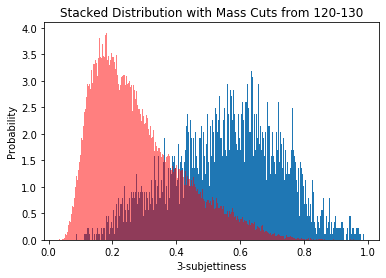

48.208  and  80.4
Significance (Mass cuts .002-.005):  5.376394027256411


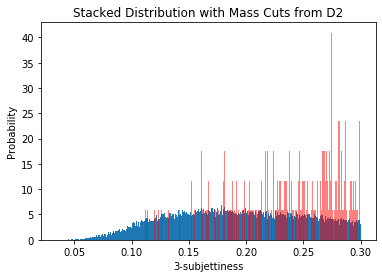

In [7]:
arr1MassD2 = []
arr1MassSigD2 = []
for i in arr1Ind:
    arr1MassD2.append(qcd['t21'][i])
for i in sig1Ind:
    arr1MassSigD2.append(higgs['t21'][i])

print(100 * (len(arr1MassSigD2) / origSig1), ' and ', 20000 * (len(arr1MassD2) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(arr1MassSigD2) / origSig1)) / (20000 * (len(arr1MassD2) / origArr1))**.5)

plt.hist(arr1MassD2, 500, density=True)
plt.hist(arr1MassSigD2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

newArr1D2 = []
newSig1D2 = []
arr1Ind2 = []
sig1Ind2 = []
for i in range(len(arr1MassD2)):
    if(arr1MassD2[i] < .3 and arr1MassD2[i] > 0):
        newArr1D2.append(arr1MassD2[i])
        arr1Ind2.append(i)
for i in range(len(arr1MassSigD2)):
    if(arr1MassSigD2[i] < .3 and arr1MassSigD2[i] > 0):
        newSig1D2.append(arr1MassSigD2[i])
        sig1Ind2.append(i)
print(100 * (len(newSig1D2) / origSig1), ' and ', 20000 * (len(newArr1D2) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(newSig1D2) / origSig1)) / (20000 * (len(newArr1D2) / origArr1))**.5)
plt.hist(newSig1D2, 500, density=True)
plt.hist(newArr1D2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from D2')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

75.847  and  980.1999999999999
Significance (Mass cuts .002-.005):  2.4225963501794676


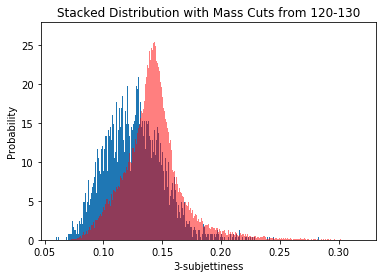

54.83  and  413.6
Significance (Mass cuts .002-.005):  2.696050239804751


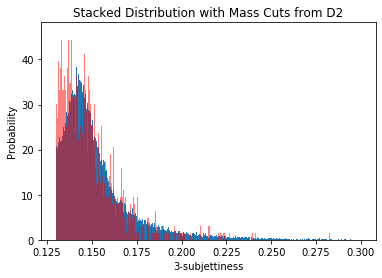

In [69]:
arr1MassD2 = []
arr1MassSigD2 = []
for i in arr1Ind:
    arr1MassD2.append(qcd['ee2'][i])
for i in sig1Ind:
    arr1MassSigD2.append(higgs['ee2'][i])

print(100 * (len(arr1MassSigD2) / origSig1), ' and ', 20000 * (len(arr1MassD2) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(arr1MassSigD2) / origSig1)) / (20000 * (len(arr1MassD2) / origArr1))**.5)

plt.hist(arr1MassD2, 500, density=True)
plt.hist(arr1MassSigD2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

newArr1D2 = []
newSig1D2 = []
arr1Ind2 = []
sig1Ind2 = []
for i in range(len(arr1MassD2)):
    if(arr1MassD2[i] < .3 and arr1MassD2[i] > .13):
        newArr1D2.append(arr1MassD2[i])
        arr1Ind2.append(i)
for i in range(len(arr1MassSigD2)):
    if(arr1MassSigD2[i] < .3 and arr1MassSigD2[i] > .13):
        newSig1D2.append(arr1MassSigD2[i])
        sig1Ind2.append(i)
print(100 * (len(newSig1D2) / origSig1), ' and ', 20000 * (len(newArr1D2) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(newSig1D2) / origSig1)) / (20000 * (len(newArr1D2) / origArr1))**.5)
plt.hist(newSig1D2, 500, density=True)
plt.hist(newArr1D2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from D2')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

75.847  and  980.1999999999999
Significance (Mass cuts .002-.005):  2.4225963501794676


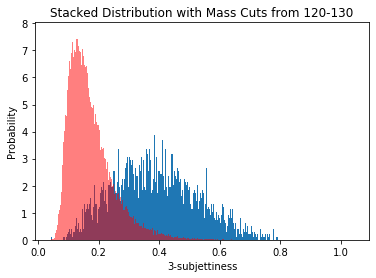

70.806  and  289.0
Significance (Mass cuts .002-.005):  4.165058823529412


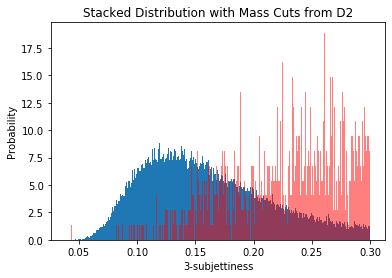

In [9]:
arr1MassD2 = []
arr1MassSigD2 = []
for i in arr1Ind:
    arr1MassD2.append(qcd['t3'][i])
for i in sig1Ind:
    arr1MassSigD2.append(higgs['t3'][i])

print(100 * (len(arr1MassSigD2) / origSig1), ' and ', 20000 * (len(arr1MassD2) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(arr1MassSigD2) / origSig1)) / (20000 * (len(arr1MassD2) / origArr1))**.5)

plt.hist(arr1MassD2, 500, density=True)
plt.hist(arr1MassSigD2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from 120-130')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()

newArr1D2 = []
newSig1D2 = []
arr1Ind2 = []
sig1Ind2 = []
for i in range(len(arr1MassD2)):
    if(arr1MassD2[i] < .3 and arr1MassD2[i] > 0):
        newArr1D2.append(arr1MassD2[i])
        arr1Ind2.append(i)
for i in range(len(arr1MassSigD2)):
    if(arr1MassSigD2[i] < .3 and arr1MassSigD2[i] > 0):
        newSig1D2.append(arr1MassSigD2[i])
        sig1Ind2.append(i)
print(100 * (len(newSig1D2) / origSig1), ' and ', 20000 * (len(newArr1D2) / origArr1))
print('Significance (Mass cuts .002-.005): ', (100 * (len(newSig1D2) / origSig1)) / (20000 * (len(newArr1D2) / origArr1))**.5)
plt.hist(newSig1D2, 500, density=True)
plt.hist(newArr1D2, 500, density=True, color='red', alpha=.5)
plt.title('Stacked Distribution with Mass Cuts from D2')
plt.xlabel('3-subjettiness')
plt.ylabel('Probability')
plt.show()